In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Hands-On Predictive Analysis with Python Workshop/Week 3 - Project

/content/gdrive/MyDrive/Colab Notebooks/Hands-On Predictive Analysis with Python Workshop/Week 3 - Project


In [44]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [4]:
from sklearn.datasets import load_breast_cancer
df = pd.DataFrame(load_breast_cancer()['data'], columns = load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [19]:
X = df.drop('y', axis=1)
y = df['y']

results = {}

# NOTE: 
The 'accuracy' here refers to the f1_score of the model

In [30]:
def classification(classifier, X=X, y=y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  score = metrics.f1_score(y_test, y_pred)
  print("Accuracy:",score)

  return score


## Decision Tree Classifier

In [31]:
results['DecisionTree'] = classification(DecisionTreeClassifier())

Accuracy: 0.923076923076923


## Gradient Boosting Method

In [32]:
results['GradientBoosting'] = classification(GradientBoostingClassifier())

Accuracy: 0.9774436090225564


## Random Forest Classifier

In [33]:
results['RandomForest'] = classification(RandomForestClassifier())

Accuracy: 0.9696969696969696


## KNN classifier

In [34]:
results['KNN'] = classification(KNeighborsClassifier())

Accuracy: 0.9473684210526316


##Tuning the DecisionTreeClassifier

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

params = {'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 50, 100], 'min_samples_leaf': [10, 20, 50]}

cv_grid = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = params)
cv_grid.fit(X_train, y_train)
best_parameters = cv_grid.best_estimator_.get_params()

for param_name in params.keys():
    print("{}: {}".format(param_name, best_parameters[param_name]))

criterion: gini
max_depth: 10
min_samples_leaf: 20


In [42]:
results['DecisionTree_tuned'] = metrics.f1_score(y_test, cv_grid.predict(X_test))
print("Accuracy:",results['DecisionTree_tuned'])

Accuracy: 0.9291338582677166


## Plotting the results

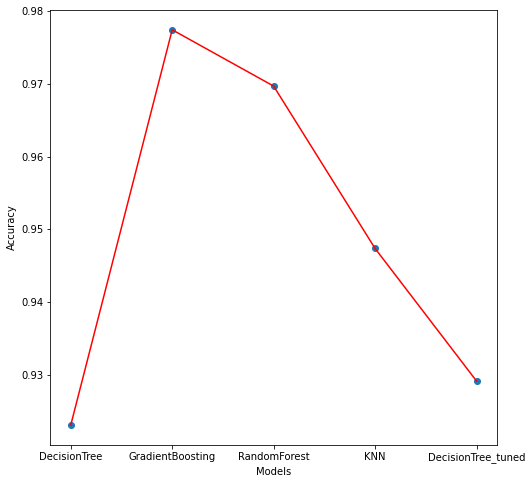

In [55]:
plt.figure(figsize = (8, 8))

plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.scatter(list(results.keys()), list(results.values()))
plt.plot(list(results.keys()), list(results.values()), 'r-')

plt.show()